# Random Forest Regressor
---

## Importação do dataset
### Dados de treino

In [1]:
import numpy as np

f_train = 'facebook_general_dataset/Dataset/Training/Features_All.csv'
X_train = np.genfromtxt(f_train, delimiter=',', usecols=range(0, 53))
y_train = np.genfromtxt(f_train, delimiter=',', usecols=(53))

print(X_train.shape)
print(y_train.shape)

(239979, 53)
(239979,)


### Dados de teste

In [2]:
f_test = 'facebook_general_dataset/Dataset/Testing/Features_TestSet.csv'
X_test = np.genfromtxt(f_test, delimiter=',', usecols=range(0, 53))
y_test = np.genfromtxt(f_test, delimiter=',', usecols=(53))

print(X_test.shape)
print(y_test.shape)

(10044, 53)
(10044,)


## Ajuste de hiperparâmetros com GridSearchCV

Utiliza cross-validation para ajustar o valor dos parâmetros `n_estimators` e `max_depth`, utilizando como critério o erro médio absoluto (MAE).

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': list(range(1, 4)),
    'max_depth': [1, 2, 4, 6],
    'criterion': ['mae'],
}

rf = GridSearchCV(
    RandomForestRegressor(),
    params,
    n_jobs=-1,
    verbose=1
)

In [ ]:
rf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


Sem resultado após 5h de execução.


---

## Variação de parâmetros usando loops

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from time import time

def random_forest(n, d):

    start = time()

    rfr = RandomForestRegressor(
        random_state = 0,
        criterion = 'mae',
        max_depth = d,
        n_estimators = n
    )

    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_test)

    end = time()

    mae  = mean_absolute_error(y_test, y_pred)
    mse  = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    dur  = end - start
    r2   = r2_score(y_test, y_pred)

    print("n_estimators: ", n,
          "\nmax_depth:  ", d,
          "\nmae:   ", mae,
          "\nrmse:  ", rmse,
          "\nR2:    ", r2,
          "\ntempo: ", dur, "\n====\n")
    
    return [mae, mse, rmse, r2, dur]

### Loops aninhados

In [ ]:
for i in range(1, 20):
    for j in range(1, 20):
        r = random_forest(i, j)
        print(r)

### Loops simples

Testa a variação de cada hiperparâmetro separadamente, mantendo os demais com valores contantes e default.

In [6]:
import pandas as pd

In [ ]:
results_d = []

for i in range(1, 20):
    results_d.append(
        i,
        random_forest(d=i)
    )

results_m = []
for i in range(1, 20):
    results_d.append(
        i,
        random_forest(n=i)
    )

pd.DataFrame(data=results_n, columns=['n_estimators', 'mae', 'rmse', 'r2']).to_pickle('storage/random-forest-n-estimators.pkl')
pd.DataFrame(data=results_d, columns=['max_depth', 'mae', 'rmse', 'r2']).to_pickle('storage/random-forest-max-depth.pkl')

## Resultados

In [8]:
import matplotlib.pyplot as plt

## Variação do hiperparâmetro `max_depth`

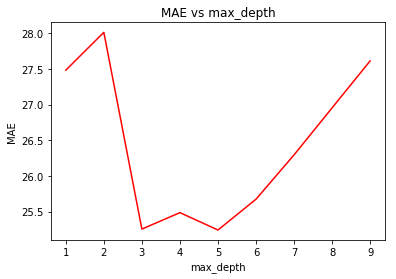

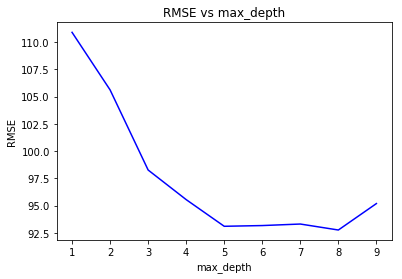

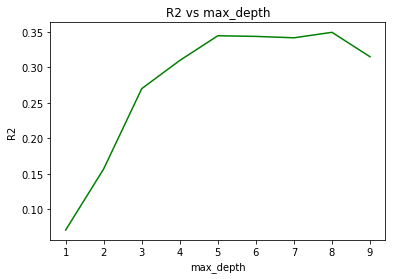

In [9]:
r = pd.read_pickle('storage/random-forest-max-depth.pkl')

r

plt.plot(r['max_depth'], r['mae'],  color='r', label='MAE')
plt.xlabel('max_depth')
plt.ylabel('MAE')
plt.title('MAE vs max_depth')
plt.show()

plt.plot(r['max_depth'], r['rmse'], color='b', label='RMSE')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title('RMSE vs max_depth')
plt.show()

plt.plot(r['max_depth'], r['r2'],   color='g', label='R2')
plt.xlabel('max_depth')
plt.ylabel('R2')
plt.title('R2 vs max_depth')
plt.show()

## Variação do hiperparâmetro `n_estimators`

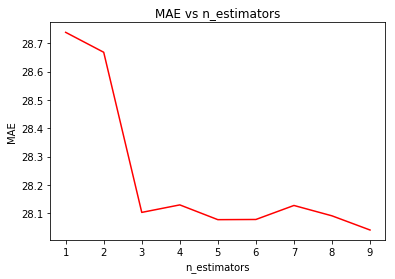

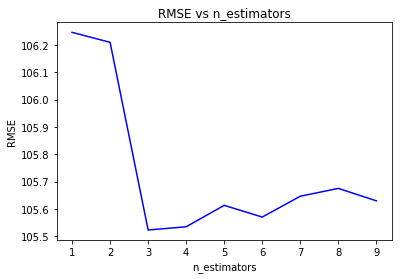

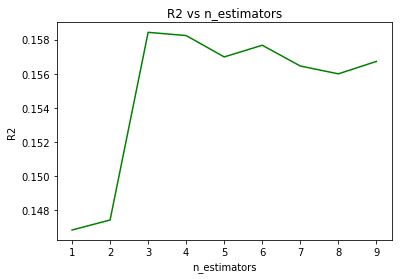

In [10]:
r = pd.read_pickle('storage/random-forest-n-estimators.pkl')

r

plt.plot(r['n_estimators'], r['mae'],  color='r', label='MAE')
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.title('MAE vs n_estimators')
plt.show()

plt.plot(r['n_estimators'], r['rmse'], color='b', label='RMSE')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs n_estimators')
plt.show()

plt.plot(r['n_estimators'], r['r2'],   color='g', label='R2')
plt.xlabel('n_estimators')
plt.ylabel('R2')
plt.title('R2 vs n_estimators')
plt.show()

## Teste com `n_estimators = max_depth = 3`

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from time import time

start = time()

rfr = RandomForestRegressor(
    random_state = 0,
    criterion = 'mae',
    max_depth = 3,
    n_estimators = 3
)

rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

end = time()

mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
dur  = end - start
r2   = r2_score(y_test, y_pred)

print(
    "\nmae:   ", mae,
    "\nrmse:  ", rmse,
    "\nR2:    ", r2,
    "\ntempo: ", dur
)